# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how='left', on="Mouse ID")

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_study_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ID = mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate_mouse_ID 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID = mouse_study_df[mouse_study_df.duplicated()]
duplicate_mouse_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
#master_data = master_data[master_data['Mouse ID'] != 'g989']
mouse_study_df = mouse_study_df[mouse_study_df['Mouse ID']!= 'g989']
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_study_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
mouse_study_groupby = mouse_study_df.groupby("Drug Regimen")

mouse_study_groupby.head()

# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_vol_mean = mouse_study_groupby["Tumor Volume (mm3)"].mean()
tumor_vol_median = mouse_study_groupby["Tumor Volume (mm3)"].median()
tumor_vol_variance = mouse_study_groupby["Tumor Volume (mm3)"].var()
tumor_vol_stddev = mouse_study_groupby["Tumor Volume (mm3)"].std()
tumor_vol_stderror = mouse_study_groupby["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Tumor Volume (mm3) mean": tumor_vol_mean, 
                                "Tumor Volume (mm3) median": tumor_vol_median,
                                "Tumor Volume (mm3) variance": tumor_vol_variance,
                                "Tumor Volume (mm3) std.dev": tumor_vol_stddev,
                                "Tumor Volume (mm3) std.error": tumor_vol_stderror})
                                
                                                                            
summary_statistics



,Tumor Volume (mm3) mean,Tumor Volume (mm3) median,Tumor Volume (mm3) variance,Tumor Volume (mm3) std.dev,Tumor Volume (mm3) std.error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

agg_summary = mouse_study_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
agg_summary


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

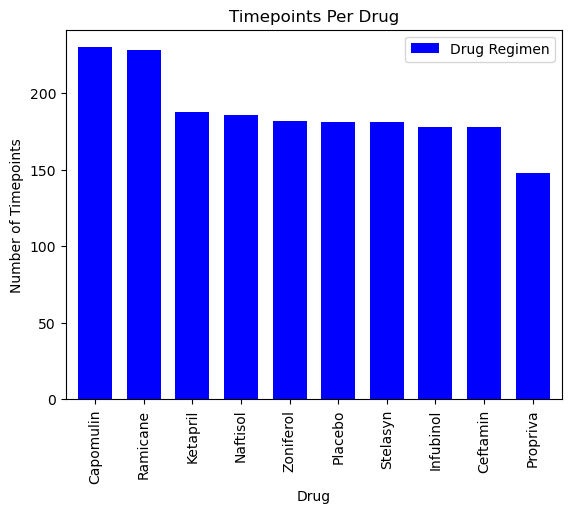

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandas_bar = mouse_study_df['Drug Regimen'].value_counts().plot.bar(color='b', width=0.7, zorder=2)
pandas_bar.legend(loc=1)
pandas_bar.set_xlabel("Drug")
pandas_bar.set_ylabel("Number of Timepoints")
pandas_bar.set_title("Timepoints Per Drug")
plt.show()

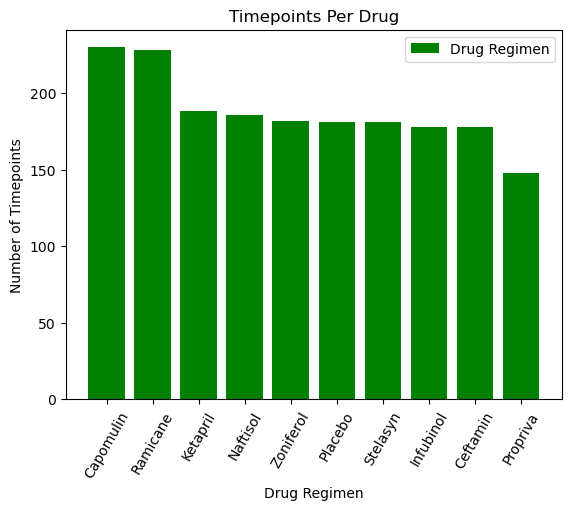

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


x_axis = mouse_study_df["Drug Regimen"].value_counts().index

y_axis = mouse_study_df["Drug Regimen"].value_counts()

plt.bar(x_axis, mouse_study_df["Drug Regimen"].value_counts(), color= 'g', label ='Drug Regimen')

plt.title("Timepoints Per Drug")

plt.legend(loc="upper right")

plt.xlabel("Drug Regimen")

plt.ylabel("Number of Timepoints")

tick_locations = x_axis

plt.xticks(tick_locations, y_axis.index.values, rotation=60)

plt.show()

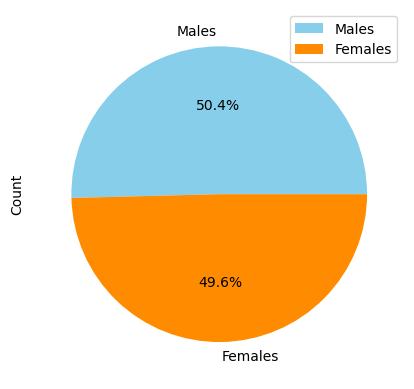

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data_female = mouse_study_df.loc[mouse_study_df["Sex"] == "Female",:]

female_count = sex_data_female["Mouse ID"].nunique()

sex_data_male = mouse_study_df.loc[mouse_study_df["Sex"] == 'Male',:]

male_count = sex_data_male['Mouse ID'].nunique()

sex_data = [['Males', float(male_count)], ["Females", float(female_count)]]

sex_df = pd.DataFrame(sex_data, columns=['Sex', 'Count'])

sex_df = sex_df.set_index('Sex')

pie_labels = ['Males', 'Females']

pie_colors = ['skyblue', 'darkorange']

sex_df.plot(kind='pie', y='Count', autopct='%1.1f%%', colors=pie_colors, labels=pie_labels)

plt.show()


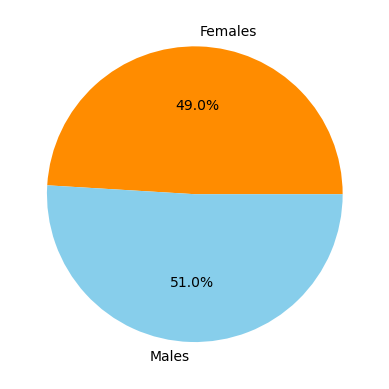

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_count = mouse_study_df.groupby(["Sex"])["Age_months"].count()

labels = ["Females", "Males"]

colors= ["darkorange","skyblue"]

plt.pie(sex_count, labels=labels, colors=colors, autopct="%1.1f%%", startangle=0)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_timepoint = mouse_study_df.groupby(['Mouse ID']).agg(Timepoint=('Timepoint','max'))

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

last_timepoint_mouse_data = last_timepoint.merge(mouse_study_df, how='inner', on=['Mouse ID', 'Timepoint'])

last_timepoint_mouse_data#.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
last_timepoint_mouse_data.tail(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3
247,z969,45,Naftisol,Male,9,30,73.867845,4


In [16]:
#Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = last_timepoint_mouse_data[last_timepoint_mouse_data["Drug Regimen"].isin(["Capomulin"])]

Ramicane_df = last_timepoint_mouse_data[last_timepoint_mouse_data["Drug Regimen"].isin(["Ramicane"])]

Infubinol_df = last_timepoint_mouse_data[last_timepoint_mouse_data["Drug Regimen"].isin(["Infubinol"])]

Ceftamin_df = last_timepoint_mouse_data[last_timepoint_mouse_data["Drug Regimen"].isin(["Ceftamin"])]


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_dict = dict()


for treatment in treatment_list:
    treatment_df = last_timepoint_mouse_data.loc[last_timepoint_mouse_data['Drug Regimen'].isin([treatment])]
    drug_volume = treatment_df['Tumor Volume (mm3)'].index.tolist()
    tumor_dict[treatment] = drug_volume

    quartiles = treatment_df.quantile([.25, .5, .75])
    lowerq = quartiles.iloc[0]['Tumor Volume (mm3)']
    upperq = quartiles.iloc[2]['Tumor Volume (mm3)']
    medq = quartiles.iloc[1]['Tumor Volume (mm3)']
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = treatment_df[(treatment_df['Tumor Volume (mm3)'] < lower_bound) | (treatment_df['Tumor Volume (mm3)'] > upper_bound)]
    
    print(f"The Outliers for{treatment}:")
    print(f"Outliers: {outliers['Tumor Volume (mm3)'].values}")      
       
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
    

The Outliers forCapomulin:
Outliers: []
The Outliers forRamicane:
Outliers: []
The Outliers forInfubinol:
Outliers: [36.3213458]
The Outliers forCeftamin:
Outliers: []


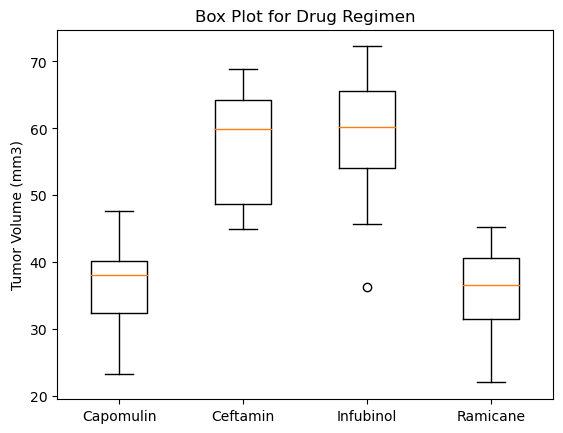

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]

# Create empty list to fill with tumor vol data (for plotting)
box_plot = [] 

# Extract Tumor Volume data for each treatment
for treatment, group in last_timepoint_mouse_data.groupby('Drug Regimen'):
    if treatment in treatments:
        box_plot.append(group['Tumor Volume (mm3)'].values)
    
fig, ax = plt.subplots()

ax.boxplot(box_plot, labels=treatments)

ax.set_ylabel('Tumor Volume (mm3)')

ax.set_title('Box Plot for Drug Regimen')

plt.show()


In [19]:
mouse_study_df["Mouse ID"].unique()

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'h246', 'h333', 'h428', 'h531', 'i386',
      

## Line and Scatter Plots

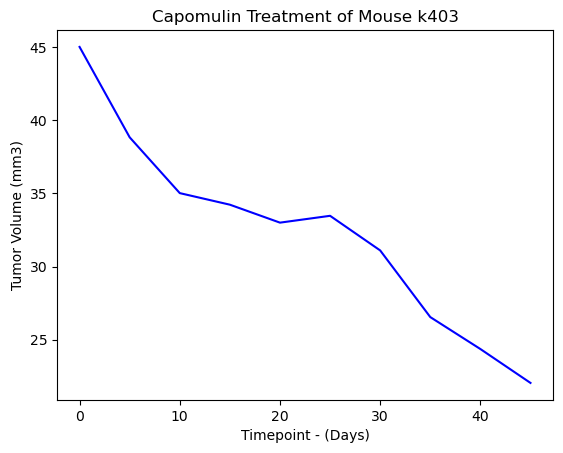

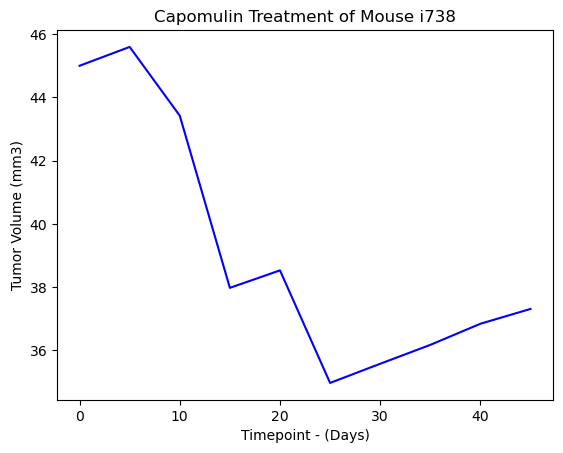

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_regimen = ['Capomulin']
capomulin_df = mouse_study_df.loc[(mouse_study_df['Tumor Volume (mm3)'] >= 32.0) &
                       (mouse_study_df['Tumor Volume (mm3)'] <= 40.0) & 
                       mouse_study_df['Drug Regimen'].isin(capomulin_regimen)]

mouse_k403_df = mouse_study_df[mouse_study_df['Mouse ID']=='k403']
mouse_k403_df
plt.plot(mouse_k403_df['Timepoint'], mouse_k403_df['Tumor Volume (mm3)'],linewidth=1.5, color ="b")
plt.xlabel("Timepoint - (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse k403")
plt.show()

mouse_i738_df = mouse_study_df[mouse_study_df['Mouse ID']=='i738']
mouse_i738_df
plt.plot(mouse_i738_df['Timepoint'], mouse_i738_df['Tumor Volume (mm3)'],linewidth=1.5, color ="b")
plt.xlabel("Timepoint - (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse i738")
plt.show()

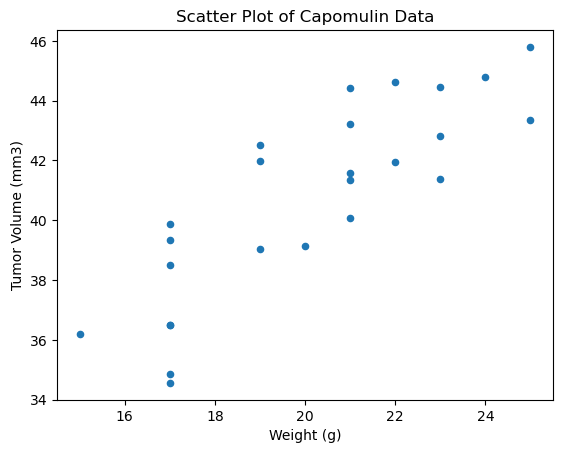

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_drug_df_1 = mouse_study_df[mouse_study_df["Drug Regimen"].isin(['Capomulin'])]

capomulin_drug_df_1

capomulin_drug_df_avg = capomulin_drug_df_1.groupby('Mouse ID').agg({'Weight (g)': ['mean'], 'Tumor Volume (mm3)': ['mean']})
capomulin_drug_df_avg
capomulin_drug_df_avg.plot(x='Weight (g)', y='Tumor Volume (mm3)', kind='scatter')

# Add title and axis labels
plt.title('Scatter Plot of Capomulin Data')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

#Show Plot
plt.show()



## Correlation and Regression

In [22]:



# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight = capomulin_drug_df_avg.iloc[:,0]
tumor = capomulin_drug_df_avg.iloc[:,1]
correlation = st.pearsonr(tumor, weight)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


x_axis = capomulin_drug_df_avg["Tumor Volume (mm3)"].astype("float")
y_axis = capomulin_drug_df_avg["Weight (g)"].astype("float")


#Linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_axis, y_axis)

#Regression calculation
regress_values = x_axis * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting the scatter
plt.scatter(x_axis, y_axis)

#Plotting the line
plt.plot(x_axis,regress_values,"r-")
reg_line_equation = plt.annotate(line_equation,(6,10), fontsize=20, color="red")
print (reg_line)
#Labels for the graph

# Add title and axis labels
plt.title('Regression Plot')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
#Show Plot
plt.show()



The correlation between mouse weight and the average tumor volume is 0.84


ValueError: too many values to unpack (expected 4)